In [1]:
import pandas as pd

In [2]:
# Here I loaded the datasets
df1 = pd.read_excel("/content/cleaned_Chungli_ao.xlsx")

In [3]:
df1.head()

,Text,Sentiment
0,Kohima nung nisung asem Tang tashi nung tashid...,POSITIVE
1,"asenok ajak semdangtsü imlaa Paisa, nüburtem d...",POSITIVE
2,Iba shisadokden senden nung atema senden nung ...,POSITIVE
3,Iba senden nung Chief menogo. Iba senden nung ...,POSITIVE
4,Iba senden nung 2021-22 atema V AC tasen ka as...,POSITIVE


In [4]:
#df2 = pd.read_excel("/content/English_dataset.xlsx")

In [5]:
#df3 =  pd.read_excel("/content/Mizo_Training_Software_project.xlsx")

In [6]:
#df4 = pd.read_excel("/content/Telugu_soft_ware_project.xlsx")

In [7]:
#df5 = pd.read_excel("/content/german_sentiment.xlsx")

In [8]:
# Concatenate the datasets
#df = pd.concat([df1,df2,df3,df4,df5])

In [9]:
df = df1

In [10]:
# Here I displayed information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8579 entries, 0 to 8578
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       8579 non-null   object
 1   Sentiment  8579 non-null   object
dtypes: object(2)
memory usage: 134.2+ KB


In [11]:
# Here I am Converting the labels to numbers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Sentiment'] = le.fit_transform(df.Sentiment.values)

In [12]:
# Here I Shuffled the dataframe
from sklearn.utils import shuffle
df = shuffle(df)

In [13]:
df

,Text,Sentiment
2852,mask kangtepa agidaktsütsü atema All Ward Unio...,0
1408,Ni TMC nung jeli sentong mapag ni Congress len...,1
2792,AMD Ryzen 5 processor den AMD Radeon graphics ...,0
1389,Iba tashidak puteta alisang Ajisüaka iba linük...,1
5309,Talisa Dimapur nung iba ano maneni tashidak ti...,1
...,...,...
2595,"Chennai, Rongchii/April 15, 2021 (Agencies): P...",0
7840,Operating Procedure (SOP) yanglushiogo. Nagala...,0
7017,Makhura-i mashi. Mi agi ki arongba ajanga Honi...,0
8214,nung azüdokshia rongrong nung lir. Suu Kyi'er ...,0


In [14]:
# Here , I Counted the number of postive and negative labels
positive_labels = (df['Sentiment'] == 1).sum()
negative_labels = (df['Sentiment'] == 0).sum()
print(f"Number of positive labels: {positive_labels}")
print(f"Number of negative labels: {negative_labels}")

Number of positive labels: 4505
Number of negative labels: 4074


In [15]:
# Here, I Split the data into training and validation sets
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels_str, val_labels_str = train_test_split(list(df['Text']), list(df['Sentiment']), test_size=.2)

In [16]:
# Here I Installed the required packages
!pip install sentencepiece
!pip install transformers
!pip install transformers accelerate
!pip install torch==1.11.00.676617

ERROR: Could not find a version that satisfies the requirement torch==1.11.00.676617 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1)
ERROR: No matching distribution found for torch==1.11.00.676617


In [17]:
# here, I loaded the model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("Blue7Bird/chungli_ao_bert_model")
model = AutoModelForSequenceClassification.from_pretrained("Blue7Bird/chungli_ao_bert_model")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/169k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/504k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/731 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/410M [00:00<?, ?B/s]

In [18]:
# Tokenize the texts
#train_encodings = tokenizer(train_texts, truncation=True, padding=True)
#val_encodings = tokenizer(val_texts, truncation=True, padding=True)

In [19]:
# Here, I ensured all elements are strings
train_texts = [str(text) for text in train_texts]
val_texts = [str(text) for text in val_texts]

In [20]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)

In [21]:
import torch

In [22]:
# Here, I defined the custom dataset class
class ChungliAo_Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [23]:
# Here, I encoded the labels
train_labels = le.fit_transform(train_labels_str)
val_labels = le.transform(val_labels_str)

# Here, I created the dataset objects
train_dataset = ChungliAo_Dataset(train_encodings, train_labels)
val_dataset = ChungliAo_Dataset(val_encodings, val_labels)

In [24]:
import torch.nn as nn
from transformers import AutoModel, AutoTokenizer

class CustomClassifier(nn.Module):
    def __init__(self, model_name, num_labels):
        super(CustomClassifier, self).__init__()
        self.base_model = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(self.base_model.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.base_model(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0, :]  # Use the representation of [CLS] token
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)

        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.classifier.out_features), labels.view(-1))

        return (loss, logits) if loss is not None else logits

In [25]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch

In [26]:
model_name = "Blue7Bird/chungli_ao_bert_model"
num_labels = 2  # Here, I Adjusted this based on the task that is 2 labels
custom_model = CustomClassifier(model_name, num_labels)

In [27]:
# Here, I defined metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='micro')
    acc = accuracy_score(labels, preds)
    return {'Accuracy': acc, 'F1': f1, 'Precision': precision, 'Recall': recall}

In [28]:
# Here, I defined the training arguments
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.0001,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    do_eval=True,
    evaluation_strategy="steps",
    load_best_model_at_end=True,
    eval_steps=10
)

# Here, I initialized the trainer
trainer = Trainer(
    model=custom_model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,            # evaluation dataset
    compute_metrics=compute_metrics,     # compute metrics function
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

# Here, I trained the model
trainer.train()

# Here, I evaluated the model
metrics = trainer.evaluate()
print(metrics)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
10,0.579400,0.546486,0.925408,0.925408,0.925408,0.925408
20,0.546300,0.471972,0.935315,0.935315,0.935315,0.935315
30,0.459900,0.374513,0.941725,0.941725,0.941725,0.941725
40,0.312900,0.276944,0.945804,0.945804,0.945804,0.945804
50,0.218200,0.212025,0.947552,0.947552,0.947552,0.947552
60,0.206000,0.218490,0.941725,0.941725,0.941725,0.941725
70,0.332500,0.238881,0.932984,0.932984,0.932984,0.932984
80,0.148500,0.169384,0.949883,0.949883,0.949883,0.949883
90,0.208800,0.181709,0.950466,0.950466,0.950466,0.950466
100,0.237500,0.182719,0.949883,0.949883,0.949883,0.949883


{'eval_loss': 0.15166258811950684, 'eval_Accuracy': 0.9621212121212122, 'eval_F1': 0.9621212121212122, 'eval_Precision': 0.9621212121212122, 'eval_Recall': 0.9621212121212122, 'eval_runtime': 22.1088, 'eval_samples_per_second': 77.616, 'eval_steps_per_second': 4.885, 'epoch': 1.2354312354312353}


In [29]:
test_df = pd.read_excel("/content/Chungli_Ao_test.xlsx")

In [30]:
len(test_df)

2000

In [31]:
test_df.head()

,Text,Sentiment
0,tajungtiba nung anir. ATMA staff dang o tajung...,POSITIVE
1,Iba osang atema onok dang agitsüpur ajak iba t...,POSITIVE
2,ni iba tasen ba ya meimer,POSITIVE
3,Aba tasayaba ya ajak dang tajungtiba,POSITIVE
4,Tajitettsütem Symptoms: (tang tashi nung angaz...,POSITIVE


In [32]:
test_df.tail()

,Text,Sentiment
1995,parnok kong aliar mejangja; süadoker asü tepuo...,NEGATIVE
1996,Magadh Range nunga DIG inyakogo.Taoba mapang C...,NEGATIVE
1997,(FLWs) aser arishi küm 45 ser temapur nem vacc...,NEGATIVE
1998,"Director, Rev Atha Neikha ajanga sayatsü. Iba ...",NEGATIVE
1999,melenshija lir.Democracy busema longkak aitba ...,NEGATIVE


In [33]:
test_texts = list(test_df['Text'])

In [34]:
test_df['Sentiment'] = le.fit_transform(test_df.Sentiment.values)

In [35]:
test_labels = test_df['Sentiment']

In [36]:
len(test_labels)

2000

In [37]:
test_encodings = tokenizer(test_texts, truncation=True, padding=True)
test_dataset = ChungliAo_Dataset(test_encodings, test_labels)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [38]:
test_metrics = trainer.evaluate(test_dataset)

In [39]:
print(test_metrics)

{'eval_loss': 0.2735215425491333, 'eval_Accuracy': 0.918, 'eval_F1': 0.918, 'eval_Precision': 0.918, 'eval_Recall': 0.918, 'eval_runtime': 52.4633, 'eval_samples_per_second': 38.122, 'eval_steps_per_second': 2.383, 'epoch': 1.2354312354312353}


File saved as misclassified_claims_ChungliAo_test_set.xlsx
Sentiment
0     17
1    147
dtype: int64


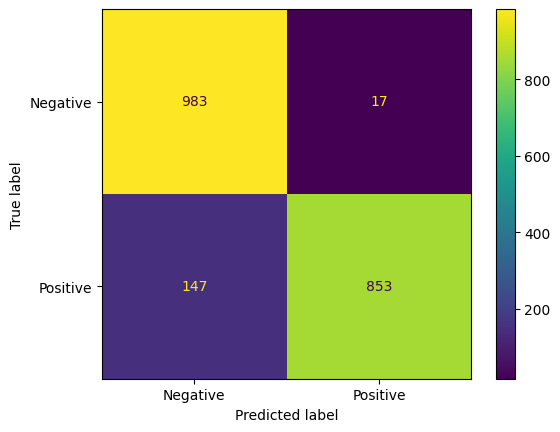

In [40]:
#Here I made the predictions on the test dataset using the trained model
test_predictions = trainer.predict(test_dataset)

# Here I converted the predictions into label indices by taking the argmax
pred_labels = test_predictions.predictions.argmax(-1)

# Here I assigned the predicted labels to a new column in the test dataframe
test_df['Predicted_Label'] = pred_labels

# Here I created a new column in the test dataframe that checks if the predicted label matches the true label
test_df['Correct'] = test_df['Sentiment'] == test_df['Predicted_Label']

# Here I filtered the dataframe to include only the rows where the prediction was incorrect
misclassified = test_df[test_df['Correct'] == False]

# Here I displayed the columns 'Claim', 'Label', and 'Predicted_Label' from the misclassified examples
misclassified[['Text', 'Sentiment', 'Predicted_Label']]

# Save the misclassified claims into a dataframe
misclassified_df = misclassified[['Text', 'Sentiment', 'Predicted_Label']]

file_path = 'misclassified_claims_ChungliAo_test_set.xlsx'
misclassified_df.to_excel(file_path, index=False)

print(f"File saved as {file_path}")

# Here I created a confusion matrix of the test set based on the results of the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_df['Sentiment'], test_df['Predicted_Label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()

# Here I wanted to see which labels are misclassified
category_errors = misclassified.groupby('Sentiment').size()
print(category_errors)

#Pushing_the_model_to_hugging_face

In [ ]:
from huggingface_hub import login
login()

In [ ]:
from huggingface_hub import create_repo

# Create a new repository with the desired name
repo_name = "Zero_shot_Soft_ware_project_ChungliAo_bert"  # Desired repository name
create_repo(repo_name)

RepoUrl('https://huggingface.co/Blue7Bird/Zero_shot_Soft_ware_project_ChungliAo_bert', endpoint='https://huggingface.co', repo_type='model', repo_id='Blue7Bird/Zero_shot_Soft_ware_project_ChungliAo_bert')

In [ ]:
model.save_pretrained("/content/results")
tokenizer.save_pretrained("/content/results")

('/content/results/tokenizer_config.json',
 '/content/results/special_tokens_map.json',
 '/content/results/vocab.txt',
 '/content/results/added_tokens.json',
 '/content/results/tokenizer.json')

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("/content/results")
model = AutoModelForSequenceClassification.from_pretrained("/content/results")

In [ ]:
model.push_to_hub("Blue7Bird/Zero_shot_Soft_ware_project_ChungliAo_bert")
tokenizer.push_to_hub("Blue7Bird/Zero_shot_Soft_ware_project_ChungliAo_bert")

model.safetensors:   0%|          | 0.00/410M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Blue7Bird/Zero_shot_Soft_ware_project_ChungliAo_bert/commit/eea55a4d58434e7924fff2edf1588e98f828c2b8', commit_message='Upload tokenizer', commit_description='', oid='eea55a4d58434e7924fff2edf1588e98f828c2b8', pr_url=None, pr_revision=None, pr_num=None)